# Mark Young
# Data Analysis and Visualization
# Project 1 Part 3
## 10/17/2024

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
datafile = "CleanedMajorsSurveyResultsFall2024.csv"
df = pd.read_csv(datafile)


## First question: What groups are underrepresented among CS students?
### My first step to answering this question is to determine what groups are underrepresented. To do this, I'll start by exploring the racial data

In [2]:
df['race'].value_counts()

race
white/caucasian                                  70
hispanic or latino                               42
multi-racial                                     36
asian                                            23
black/african american                           15
choose not to reply                               8
american indian/native american/alaska native     3
Name: count, dtype: int64

### Drop choose not to reply, since it is not useful for determining this question

In [3]:
dfr = df[df['race'] != 'choose not to reply']

### Turning this into a piechart, we have:

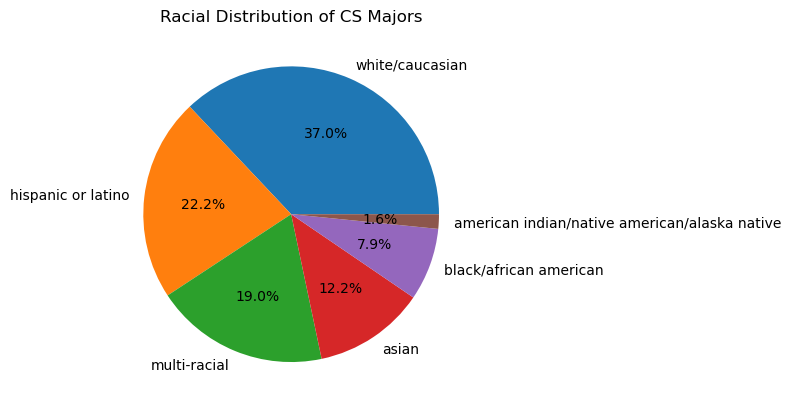

In [4]:
raceCounts = dfr['race'].value_counts()
plt.pie(raceCounts, labels=raceCounts.index, autopct='%1.1f%%')
plt.title('Racial Distribution of CS Majors')
plt.show()

### Looking at this data, I can definintly identify some big differences in racial representation. 
### In order to determine wheter this is representitive of the general popoulation, I will compare it to the racial brackdown of the general population morris county
### Here I have demographic data from spring 2024 to compare
##### Asian: 326
##### Black African American: 301 
##### Hawaiian Pacific Islander: 7
##### Hispanic: 1,597
##### Native American: 11
##### White: 2,390
##### 2 Or More: 160
##### Unknown: 744 
### we can change the labels to reflect our dataframe. We'll drop Hawaiian Pacific Islander as there is no comparision with our survey and it's a very small point of data. I'll also consider unknown as choose not to reply, and drop it as well.
##### asian: 326
##### black/african american: 301 
##### hispanic of latino: 1,597
##### american indian/native american/alaska native: 11
##### white/caucasian: 2,390
##### multi-racial: 160
### now we'll turn this into a dictionary, then convert into a dataframe

In [5]:
raceDataCCM = {
    'asian': 326,
    'black/african american': 301,
    'hispanic or latino': 1597,
    'american indian/native american/alaska native': 11,
    'white/caucasian': 2390,
    'multi-racial': 160
}

dfRaceCCM = pd.DataFrame(list(raceDataCCM.items()), columns=['race', 'count'])

### making a pie chart of all the students that go to CCM

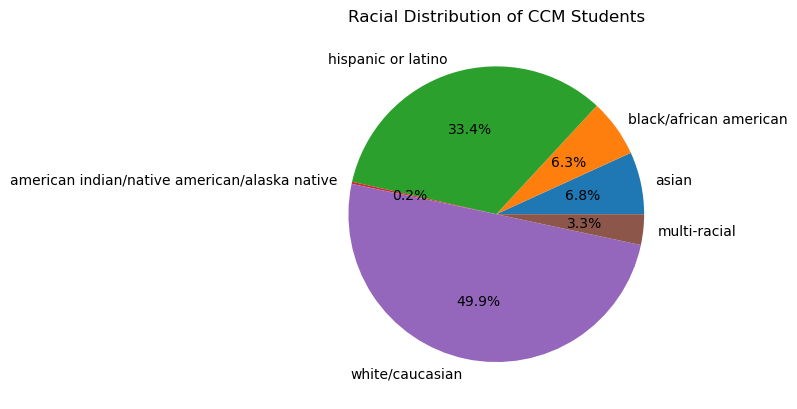

In [6]:
raceCounts = dfr['race'].value_counts()
plt.pie(dfRaceCCM['count'], labels=dfRaceCCM['race'], autopct='%1.1f%%')
plt.title('Racial Distribution of CCM Students')
plt.show()

### Now let's compare the data side by side
#### Note that this code was assisted with ai. I was struggling to get the side by side bar graph correct, and I asked chatGPT to reveiw and correct my code

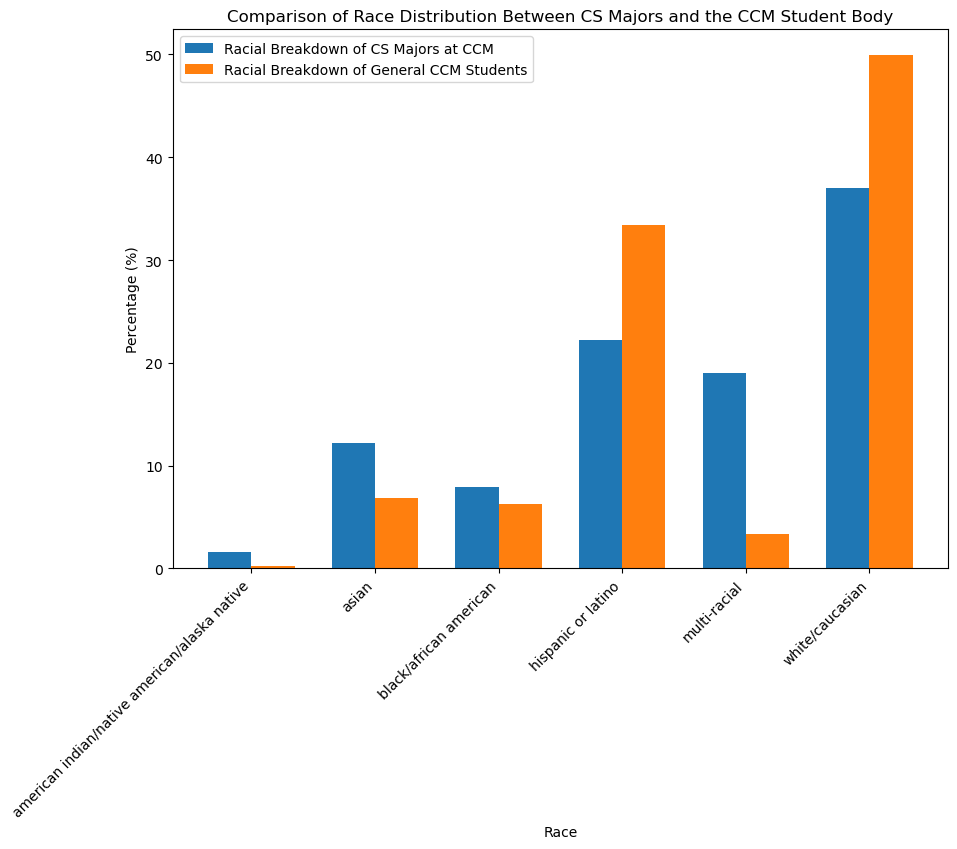

In [7]:
raceCountCS = {
    'white/caucasian': 70,
    'hispanic or latino': 42,
    'multi-racial': 36,
    'asian': 23,
    'black/african american': 15,
    'american indian/native american/alaska native': 3
}

raceCountCCM = {
    'asian': 326,
    'black/african american': 301,
    'hispanic or latino': 1597,
    'american indian/native american/alaska native': 11,
    'white/caucasian': 2390,
    'multi-racial': 160
}

# get race labels for both datasets
labels = sorted(set(raceCountCS.keys()).union(set(raceCountCCM.keys())))

valuesCS = [raceCountCS.get(label, 0) for label in labels]
valuesCCM = [raceCountCCM.get(label, 0) for label in labels]

totalCS = sum(valuesCS)
totalCCM = sum(valuesCCM)

# convert counts to percentages
percentageCS = [(count / totalCS) * 100 for count in valuesCS] 
percentageCCM = [(count / totalCCM) * 100 for count in valuesCCM]

width = 0.35
positionCS = [i for i in range(len(labels))]
positionCCM = [i + width for i in positionCS]  # offset for second dataset

# create the bar chart
fig, ax = plt.subplots(figsize=(10, 7))

barsCS = ax.bar(positionCS, percentageCS, width, label='Racial Breakdown of CS Majors at CCM')
barsCCM = ax.bar(positionCCM, percentageCCM, width, label='Racial Breakdown of General CCM Students')

ax.set_xlabel('Race')
ax.set_ylabel('Percentage (%)')
ax.set_title('Comparison of Race Distribution Between CS Majors and the CCM Student Body')
ax.set_xticks([i + width / 2 for i in positionCS])  # center the ticks between the bars
ax.set_xticklabels(labels, rotation=45, ha='right') # make labels readable
ax.legend()

plt.show()

### We can clearly see that the underrepresented groups amoung CS students are white/caucasian and hispanic or latino

## Second Question: Looking at the latest survey results (2024) from both the Majors and Non-Majors surveys, what are the race/ethnicity demographic differences between the Majors and Non-Majors respondents?

### This can be approached in a similar fasion to the previous question

In [8]:
datafile2 = "CleanedNonMajorsSurveyResultsFall2024.csv"
df2 = pd.read_csv(datafile2)

### Drop choose not to reply, since it is not useful for determining this question

In [9]:
df2 = df2[df2['race'] != 'choose not to reply']

### inspect the data

In [10]:
df2['race'].value_counts()

race
white/caucasian           36
hispanic or latino        26
multi-racial              16
black/african american     6
asian                      3
Name: count, dtype: int64

### Making a graph to compare racial distribution between the two groups

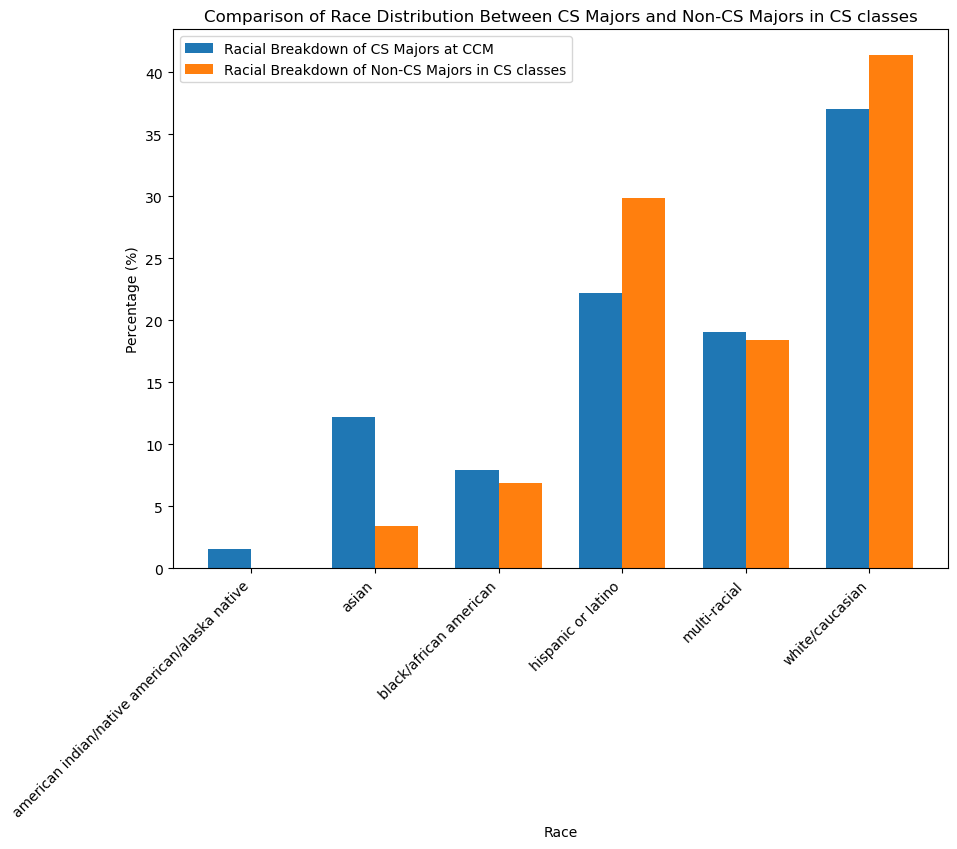

In [11]:
raceCountCS = {
    'white/caucasian': 70,
    'hispanic or latino': 42,
    'multi-racial': 36,
    'asian': 23,
    'black/african american': 15,
    'american indian/native american/alaska native': 3
}

raceCountNonCS = {
    'white/caucasian': 36,
    'hispanic or latino': 26,
    'multi-racial': 16,
    'asian': 3,
    'black/african american': 6,
    'american indian/native american/alaska native': 0
}

# get race labels for both datasets
labels = sorted(set(raceCountCS.keys()).union(set(raceCountNonCS.keys())))

valuesCS = [raceCountCS.get(label, 0) for label in labels]
valuesNonCS = [raceCountNonCS.get(label, 0) for label in labels]

totalCS = sum(valuesCS)
totalNonCS = sum(valuesNonCS)

# convert counts to percentages
percentageCS = [(count / totalCS) * 100 for count in valuesCS] 
percentageNonCS = [(count / totalNonCS) * 100 for count in valuesNonCS]

width = 0.35
positionCS = [i for i in range(len(labels))]
positionNonCS = [i + width for i in positionCS]  # offset for second dataset

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 7))

barsCS = ax.bar(positionCS, percentageCS, width, label='Racial Breakdown of CS Majors at CCM')
barsCCM = ax.bar(positionNonCS, percentageNonCS, width, label='Racial Breakdown of Non-CS Majors in CS classes')

ax.set_xlabel('Race')
ax.set_ylabel('Percentage (%)')
ax.set_title('Comparison of Race Distribution Between CS Majors and Non-CS Majors in CS classes')
ax.set_xticks([i + width / 2 for i in positionCS])  # center the ticks between the bars
ax.set_xticklabels(labels, rotation=45, ha='right') # make labels readable
ax.legend()

plt.show()

## Third question: What are the top three most popular reasons that drive students to sign up for computing classes?
### This revolves around the survey question "To what extent did the following activities or experience impact your decision to enroll in an computing course at CCM?"

In [12]:
impact_comp_columns = df.filter(like='impact_comp')
high_impact_count = (impact_comp_columns == 'high impact').sum().sort_values(ascending=False)
print(high_impact_count)

impact_comp_family_or_friend_influence                         42
impact_comp_family_or_friend_working_in_the_computing_field    40
impact_comp_middle/high_school_computing_class                 33
impact_comp_competitions                                       23
impact_comp_an_ap_computing_class                              22
impact_comp_high_school_teacher_or_guidance_counselor          21
impact_comp_middle/high_school_computing_related_club          19
impact_comp_student                                            15
impact_comp_experience_at_work                                 15
impact_comp_a_dual_enrollment_computing_class                  11
impact_comp_employer_influence                                  9
impact_comp_afterschool_computing-related_camp/program          7
impact_comp_summer_computing_related_camp/program               5
dtype: int64


### Now I'll put it as a bar chart

Text(0.5, 0, 'Number of High Impacts')

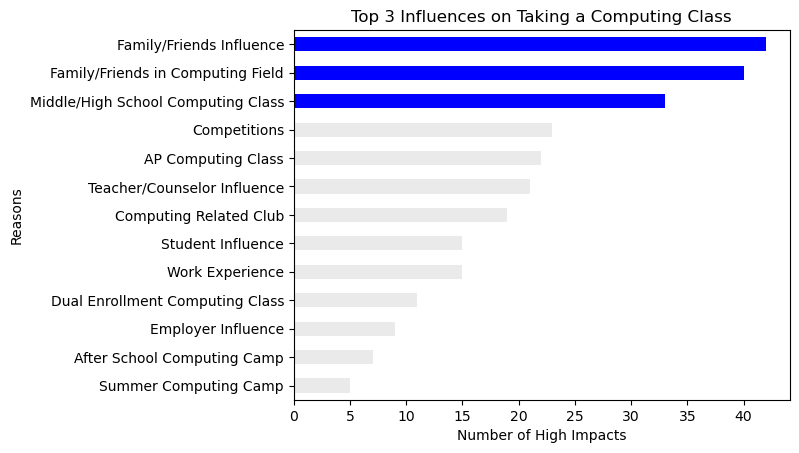

In [13]:
#renaming columns
rename = {
    'impact_comp_family_or_friend_influence': 'Family/Friends Influence',
    'impact_comp_family_or_friend_working_in_the_computing_field': 'Family/Friends in Computing Field',
    'impact_comp_other': 'Other',
    'impact_comp_middle/high_school_computing_class': 'Middle/High School Computing Class',
    'impact_comp_competitions': 'Competitions',
    'impact_comp_an_ap_computing_class': 'AP Computing Class',
    'impact_comp_high_school_teacher_or_guidance_counselor': 'Teacher/Counselor Influence',
    'impact_comp_middle/high_school_computing_related_club': 'Computing Related Club',
    'impact_comp_student': 'Student Influence',
    'impact_comp_experience_at_work': 'Work Experience',
    'impact_comp_a_dual_enrollment_computing_class': 'Dual Enrollment Computing Class',
    'impact_comp_employer_influence': 'Employer Influence',
    'impact_comp_afterschool_computing-related_camp/program': 'After School Computing Camp',
    'impact_comp_summer_computing_related_camp/program': 'Summer Computing Camp'
}
colors = ['#eaeaea']*10 + ['blue']*3
high_impact_count.index = high_impact_count.index.map(rename)
high_impact_count.iloc[::-1].plot(kind='barh', color=colors)
plt.title('Top 3 Influences on Taking a Computing Class')
plt.ylabel('Reasons')
plt.xlabel('Number of High Impacts')


## Fourth Question: For those who a computing major was not their first choice, what were the top majors they came from?

In [14]:
df['change_major'].value_counts()

change_major
first choice                     92
engineering                      10
business                          7
science                           7
nursing/radiology                 3
cybersecurity                     2
liberal arts                      2
data analytics and statistics     1
nursing                           1
computer science                  1
biology                           1
exercise science                  1
art                               1
i’m a senior in high school       1
journalism                        1
physical therapy                  1
Name: count, dtype: int64

### I'll drop the uinque values as not to clutter the a graph

In [15]:
dfChange = df['change_major'].value_counts()
dfChange = dfChange[dfChange > 1]

### and I'll drop the first choice column, since we're not interested in that either

In [16]:
dfChange = dfChange.drop('first choice')

### now let's graph the results

Text(0.5, 1.0, 'Top Previous Majors')

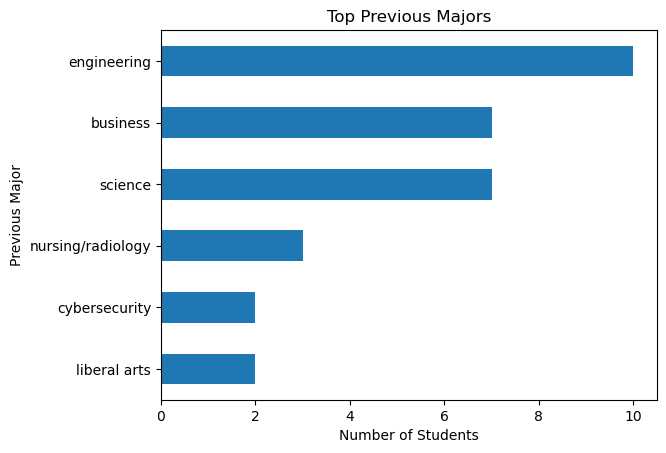

In [17]:
dfChange.iloc[::-1].plot(kind='barh')
plt.ylabel('Previous Major')
plt.xlabel('Number of Students')
plt.title('Top Previous Majors')

### Most of our major switches come from engineering

### We can also look at what degree program students are in

In [18]:
df['degree'].value_counts()

degree
computer science                                      61
information technology                                37
engineering                                           22
cybersecurity                                         13
data science                                          10
sharetime csip program                                 8
business                                               8
undecided                                              7
cis game development option                            7
non degree seeking                                     6
challenger program                                     3
technical studies, applied associate of science        3
graphic design                                         2
digital media technology                               2
liberal arts                                           1
high school                                            1
fire science technology                                1
chemistry               

### Graph the top five degrees

Text(0.5, 1.0, 'Top Five Degree Programs')

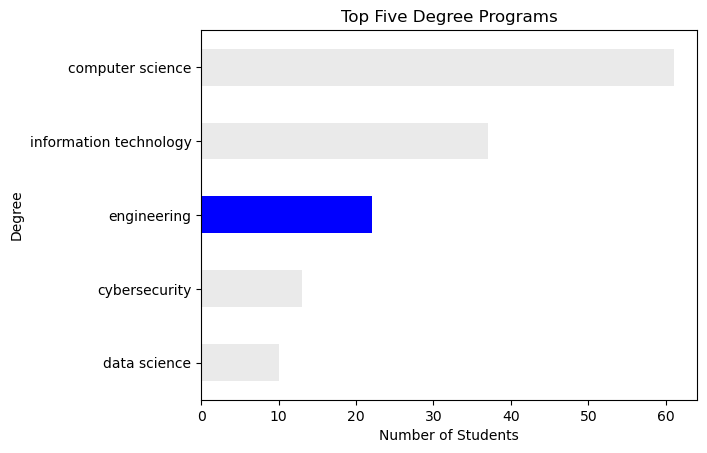

In [19]:
dfDegree = df['degree'].value_counts()
dfDegree = dfDegree[dfDegree > 8]
colors = ['#eaeaea']*2 + ['blue']*1 + ['#eaeaea']*2
dfDegree.iloc[::-1].plot(kind='barh', color = colors)
plt.ylabel('Degree')
plt.xlabel('Number of Students')
plt.title('Top Five Degree Programs')

### As we can see, the only non-computing degree in the top five is engineering
### This indicates that engineering students are likely to be interested in computing